In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('peaktweets-Vax.csv')
df.head()

,Tweet_ID,Date Created,Sentiment_Label,Logits_Neutral,Logits_Positive,Logits_Negative
0,1.344802e+18,Fri Jan 01 00:27:28 +0000 2021,negative,1.615843,-1.299868,3.457460
1,1.344810e+18,Fri Jan 01 00:59:25 +0000 2021,negative,1.844332,-0.402600,2.129192
2,1.344799e+18,Fri Jan 01 00:14:03 +0000 2021,negative,1.050628,0.721298,1.054364
3,1.344799e+18,Fri Jan 01 00:15:57 +0000 2021,negative,1.074725,0.304748,1.180603
4,1.344799e+18,Fri Jan 01 00:15:59 +0000 2021,negative,1.310275,-1.350008,3.740049


In [3]:
## convert the dataframe from datapoints to ratios by day
df['Date Created'] = pd.to_datetime(df['Date Created']).dt.date
byDate = df.groupby('Date Created')
ser = pd.DataFrame(byDate['Sentiment_Label'].value_counts()).rename(columns={'Sentiment_Label': 'Sentiments'})
ser = ser.reset_index()
byDate = pd.DataFrame(columns=['Date Created', 'negative', 'neutral', 'positive'])
currDate = 0
currDict = {}
for _, row in ser.iterrows():
    if currDate != row['Date Created']:
        if currDate != 0:
            byDate = byDate.append(currDict, ignore_index = True)
        currDate = row['Date Created']
        currDict = {}
        currDict['Date Created'] = currDate
    currDict[row['Sentiment_Label']] = row['Sentiments']
byDate['tweetCount'] = byDate.apply(lambda row : row['negative']+row['neutral']+row['positive'], axis=1)
byDate['negative%'] = byDate['negative']/byDate['tweetCount']
byDate['neutral%'] = byDate['neutral']/byDate['tweetCount']
byDate['positive%'] = byDate['positive']/byDate['tweetCount']
byDate.head()

,Date Created,negative,neutral,positive,tweetCount,negative%,neutral%,positive%
0,2021-01-01,830,1023,547,2400,0.345833,0.42625,0.227917
1,2021-01-02,762,1296,342,2400,0.3175,0.54,0.1425
2,2021-01-03,759,1299,342,2400,0.31625,0.54125,0.1425
3,2021-01-04,680,1367,353,2400,0.283333,0.569583,0.147083
4,2021-01-05,809,1318,273,2400,0.337083,0.549167,0.11375


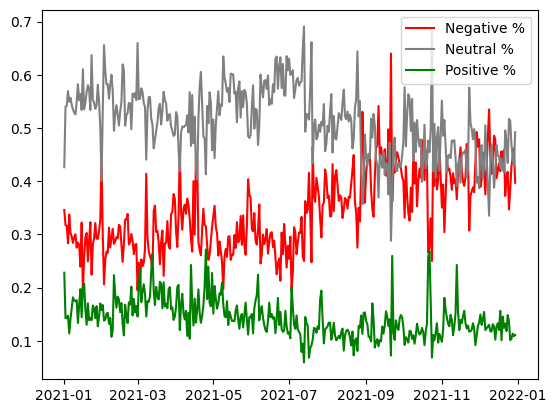

In [4]:
## graph the ratios over time
plt.plot(list(byDate['Date Created']), list(byDate['negative%']) , color='red', label='Negative %')
plt.plot(list(byDate['Date Created']), list(byDate['neutral%']) , color='grey', label='Neutral %')
plt.plot(list(byDate['Date Created']), list(byDate['positive%']) , color='green', label='Positive %')
plt.legend()
plt.show()

In [5]:
### Look at biggest/smallest dates of positive and negative and investigate issues which led to that
posMax = byDate[byDate['positive%'] == byDate['positive%'].max()]
negMax = byDate[byDate['negative%'] == byDate['negative%'].max()]
posMin = byDate[byDate['positive%'] == byDate['positive%'].min()]
negMin = byDate[byDate['negative%'] == byDate['negative%'].min()]

print('The biggest positive percent was ' + str(posMax['positive%'].iloc[0] * 100) + '% on ' + str(posMax['Date Created'].iloc[0]))
print('The biggest negative percent was ' + str(negMax['negative%'].iloc[0] * 100) + '% on ' + str(negMax['Date Created'].iloc[0]))
print('The lowest positive percent was ' + str(posMin['positive%'].iloc[0] * 100) + '% on ' + str(posMin['Date Created'].iloc[0]))
print('The lowest negative percent was ' + str(negMin['negative%'].iloc[0] * 100) + '% on ' + str(negMin['Date Created'].iloc[0]))

The biggest positive percent was 27.166666666666668% on 2021-04-25
The biggest negative percent was 64.0% on 2021-09-21
The lowest positive percent was 5.916666666666667% on 2021-07-13
The lowest negative percent was 19.083333333333332% on 2021-01-16


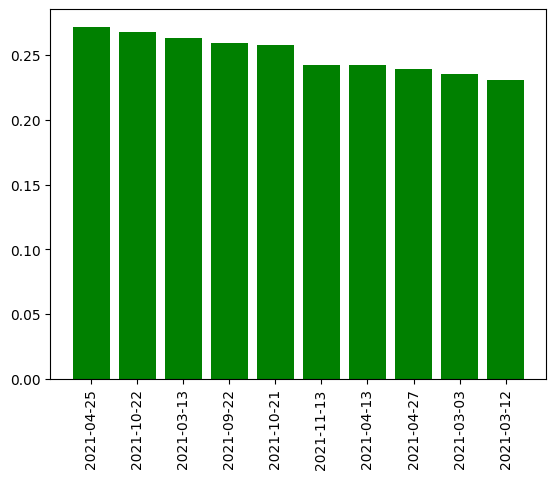

In [6]:
### Look at largest positives
maxPosDf = byDate.sort_values('positive%', ascending = False).head(10)
maxPosDf['Date Created'] = maxPosDf['Date Created'].astype(str)
plt.bar(list(maxPosDf['Date Created']), list(maxPosDf['positive%']), color = 'green')
plt.xticks(rotation=90)
plt.show()

## The biggest uptick is quite significant at almost 10% more than any other day on the 16th of April

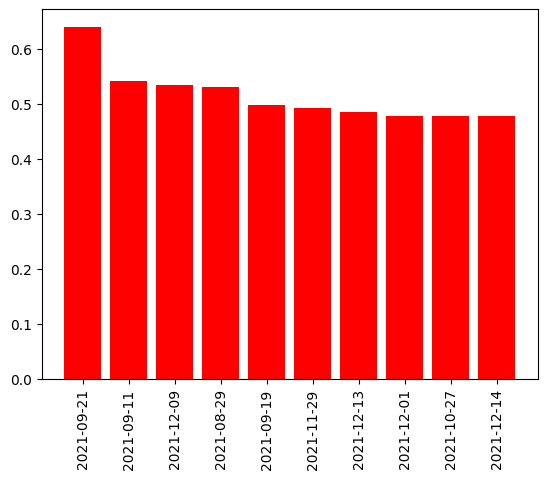

In [7]:
### Look at largest negatives
maxNegDf = byDate.sort_values('negative%', ascending = False).head(10)
maxNegDf['Date Created'] = maxNegDf['Date Created'].astype(str)
plt.bar(list(maxNegDf['Date Created']), list(maxNegDf['negative%']), color = 'red')
plt.xticks(rotation=90)
plt.show()


In [8]:
## create a dataframe of the differences between days
diffDf = byDate[['negative%', 'neutral%', 'positive%']].diff()
diffDf.insert(loc = 0, column = 'Date', value = byDate['Date Created'])
diffDf.head()

,Date,negative%,neutral%,positive%
0,2021-01-01,NaN,NaN,NaN
1,2021-01-02,-0.0283333,0.11375,-0.0854167
2,2021-01-03,-0.00125,0.00125,0
3,2021-01-04,-0.0329167,0.0283333,0.00458333
4,2021-01-05,0.05375,-0.0204167,-0.0333333


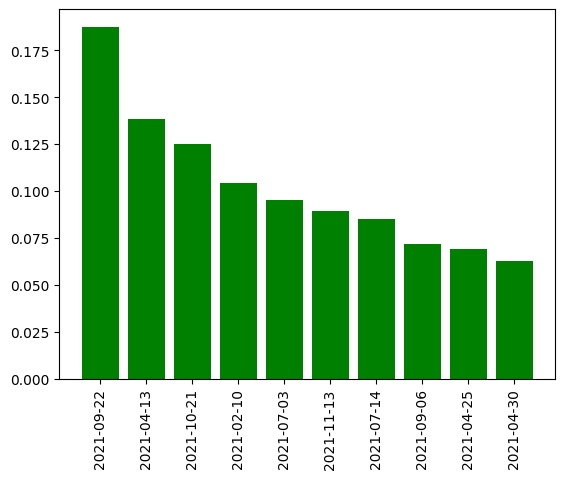

In [9]:
## dates of the biggest changes in positive
maxPosDf = diffDf.sort_values('positive%', ascending = False).head(10)
maxPosDf['Date'] = maxPosDf['Date'].astype(str)
plt.bar(list(maxPosDf['Date']), list(maxPosDf['positive%']), color = 'green')
plt.xticks(rotation=90)
plt.show()

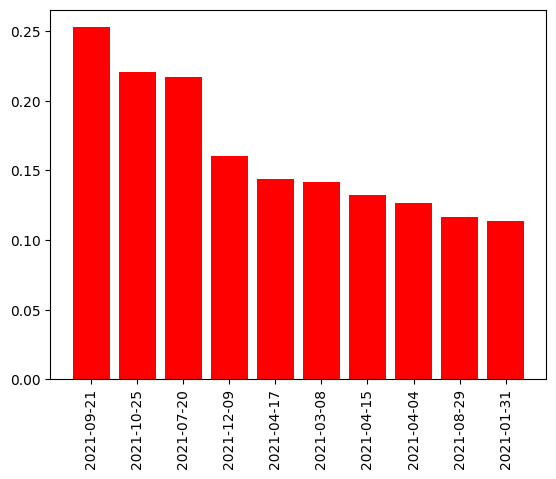

In [10]:
## dates of the biggest changes in negative
maxPosDf = diffDf.sort_values('negative%', ascending = False).head(10)
maxPosDf['Date'] = maxPosDf['Date'].astype(str)
plt.bar(list(maxPosDf['Date']), list(maxPosDf['negative%']), color = 'red')
plt.xticks(rotation=90)
plt.show()

In [17]:
## load the covid statistics
covidData = pd.read_csv("owid-covid-data.csv")
covidData = covidData[(covidData['location'] == 'United States') & (covidData['date'].str.contains('2021'))]
covidData['date'] = pd.to_datetime(covidData['date']).dt.date

In [59]:
## create a dataframe to see the pearson correlations of the variables
corrDf = byDate[['Date Created', 'positive%', 'negative%']]
tempDf = covidData[['date', 'new_cases', 'new_vaccinations','new_deaths']]
corrDf = corrDf.merge(tempDf, how = 'inner', left_on = 'Date Created', right_on = 'date')
corrDf = corrDf.drop(columns = ['date'])
corrDf['positive%'] = pd.to_numeric(corrDf['positive%'])
corrDf['negative%'] = pd.to_numeric(corrDf['negative%'])
correlation = corrDf.corr()

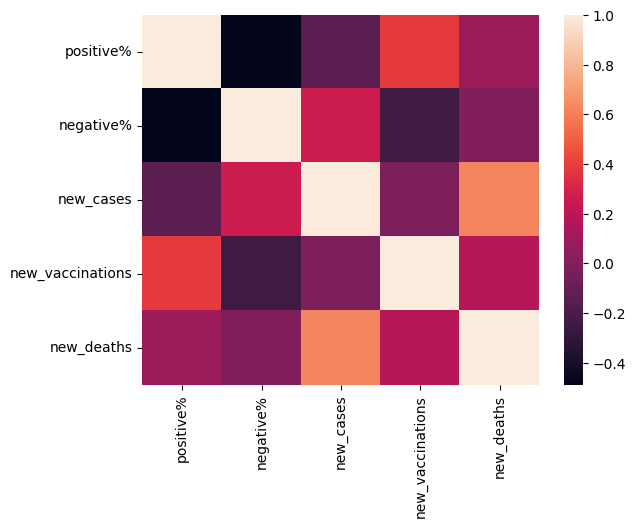

In [64]:
## create a heatmap of the correlation
sb.heatmap(correlation)
plt.show()

In [52]:
## look at the covariance
corrDf.cov()

,positive%,negative%,new_cases,new_vaccinations,new_deaths
positive%,0.001289,-0.001291,-3.704461e+02,1.317990e+04,3.484940e+00
negative%,-0.001291,0.005431,1.500568e+03,-1.686725e+04,-1.896526e-01
new_cases,-370.446074,1500.567736,6.173454e+09,-1.203522e+09,5.103571e+07
new_vaccinations,13179.898220,-16867.251837,-1.203522e+09,8.917361e+11,1.803165e+08
new_deaths,3.484940,-0.189653,5.103571e+07,1.803165e+08,1.099518e+06


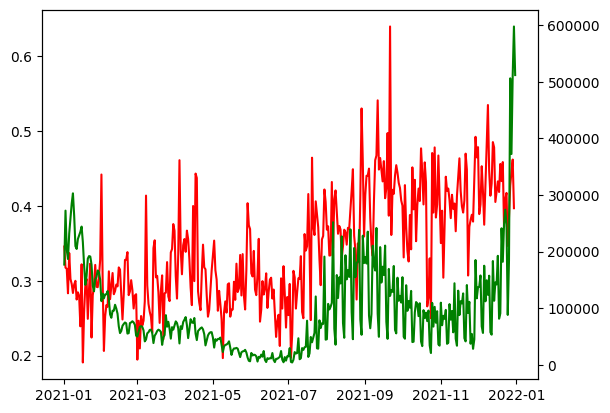

In [30]:
fig, ax = plt.subplots()
ax.plot(list(byDate['Date Created']), list(byDate['negative%']), color = 'red', label = 'Negative%')
ax2 = ax.twinx()
ax2.plot(list(covidData['date']), list(covidData['new_cases']), color = 'green', label = 'New Cases')
plt.xticks(rotation=90)
plt.show()

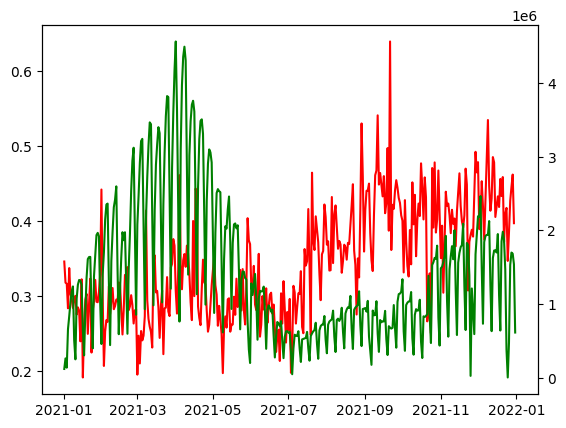

In [32]:
fig, ax = plt.subplots()
ax.plot(list(byDate['Date Created']), list(byDate['negative%']), color = 'red', label = 'Negative%')
ax2 = ax.twinx()
ax2.plot(list(covidData['date']), list(covidData['new_vaccinations']), color = 'green', label = 'New Cases')
plt.xticks(rotation=90)
plt.show()

In [31]:
covidData.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't